# Question 1

In [1]:
from sklearn . datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate 4 classes of blobs
X , y = make_blobs ( n_samples =[31 , 29 , 29 , 31] , random_state =7)

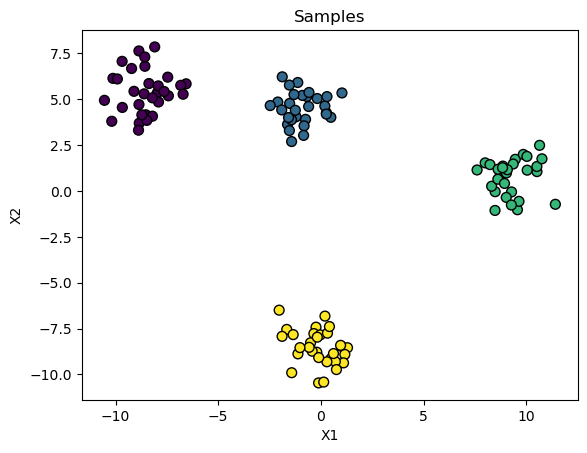

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
plt.title('Samples')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

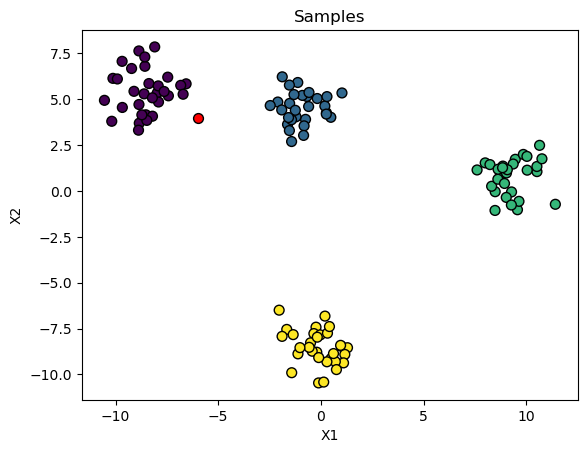

In [4]:
x_test = [-6, 4]
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
plt.scatter(x_test[0], x_test[1], c='red', edgecolors='k', s=50)
plt.title('Samples')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [5]:
# Function for returning mean and standard deviations for each feature
def return_values(X, features):
    mean_values = ([np.mean(X[:, i:i+1]) for i in range(features)])
    std_values = ([np.std(X[:, i:i+1]) for i in range(features)])
    return mean_values, std_values

# Function for calculating relevant values for each class in the dataset
def return_classes(X, y, features):
    classes = []
    for i in set(y):
        classes.append(return_values(X[y==i], features))
    return classes

# Calculating mean and standard deviation values for each feature in every class in the dataset
classes = return_classes(X, y, 2)

In [6]:
# Function for calculating probability density of normal distribution
def gaussian(x, mean, std):
    pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.e**( (-1/2) * ((x - mean)/std)**2 )
    return pdf

In [7]:
# Defining prior probability for each class
p_w1 = 31/120
p_w2 = 29/120
p_w3 = 29/120
p_w4 = 31/120
class_prob = [p_w1, p_w2, p_w3, p_w4]

In [8]:
# Calculating the likelihood of a point belonging to each of the classes
def calculate_p_x(classes, x, features, class_prob):
    prob_class = []
    for it, i in enumerate(classes):
        probability = 1
        for j in range(features):
            probability *= gaussian(x[j], i[0][j], i[1][j])
        prob_class.append(probability * class_prob[it])
    return prob_class

# Normalizing the probability for each class and printing it
def print_probabilities(list_of_probabilities):
    for i, value in enumerate(list_of_probabilities):
        print(f'Probability for class {i+1}: {value / np.sum(list_of_probabilities)}')

# Picking the class with the highest probability
def prediction(list_of_probabilities):
    return np.argmax(list_of_probabilities)
    
class_probabilities = calculate_p_x(classes, x_test, 2, class_prob)
print_probabilities(class_probabilities)



Probability for class 1: 0.9999988997909107
Probability for class 2: 1.1002090891733325e-06
Probability for class 3: 2.717829487349645e-65
Probability for class 4: 6.52346511738987e-47


# Iris

In [9]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

In [10]:
iris = load_iris()
iris_X_2 = iris.data[:,0:2]
iris_X_4 = iris.data[:,0:4]
iris_y = iris.target

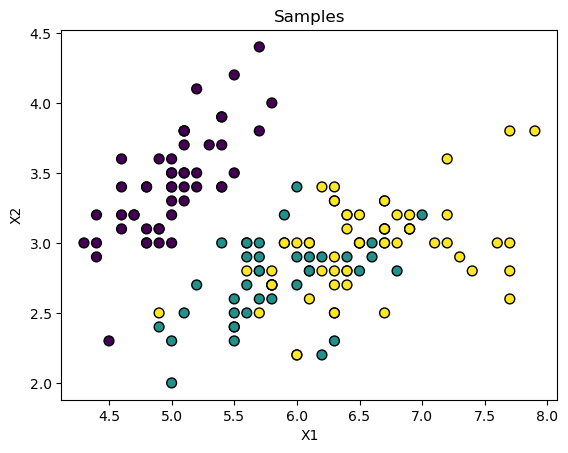

In [11]:
plt.scatter(iris_X_2[:, 0], iris_X_2[:, 1], c=iris_y, edgecolors='k', s=50)
plt.title('Samples')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [12]:
iris_classes_2 = return_classes(iris_X_2, iris_y, 2)
iris_class_prob = [50/150, 50/150, 50/150]
iris_predictions_2 = [prediction(calculate_p_x(iris_classes_2, iris_X_2[i], 2, iris_class_prob)) for i in range(len(iris_X_2))]

In [13]:
cm = confusion_matrix(iris_y, iris_predictions_2)
print("Confusion Matrix with two features: \n", cm)

Confusion Matrix with two features: 
 [[49  1  0]
 [ 0 37 13]
 [ 0 19 31]]


In [14]:
iris_classes_4 = return_classes(iris_X_4, iris_y, 4)
iris_predictions_4 = [prediction(calculate_p_x(iris_classes_4, iris_X_4[i], 4, iris_class_prob)) for i in range(len(iris_X_4))]

In [15]:
cm = confusion_matrix(iris_y, iris_predictions_4)
print("Confusion Matrix with four features: \n", cm)

Confusion Matrix with four features: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
